In [37]:
import os
import pickle
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style='ticks')


%matplotlib inline

def setup_mpl():
    # mpl.rc('font', size=7)
    # mpl.rcParams['font.size'] = 8
    mpl.rcParams['legend.fontsize'] = 5
    mpl.rcParams['legend.title_fontsize'] = 5
    mpl.rcParams['xtick.labelsize'] = 5
    mpl.rcParams['ytick.labelsize'] = 5
    mpl.rcParams['lines.linewidth'] = 1
    mpl.rcParams['xtick.major.width'] = 2/3.
    mpl.rcParams['ytick.major.width'] = 2/3.
    mpl.rcParams['xtick.minor.width'] = 2/3.
    mpl.rcParams['ytick.minor.width'] = 2/3.
    mpl.rcParams['xtick.major.size'] = 3
    mpl.rcParams['ytick.major.size'] = 3
    mpl.rcParams['xtick.minor.size'] = 1.5
    mpl.rcParams['ytick.minor.size'] = 1.5
    mpl.rcParams['axes.linewidth'] = 2/3.
    mpl.rcParams['ytick.direction'] = 'in'
    mpl.rcParams['xtick.direction'] = 'in'
    # mpl.rcParams['xtick.top']=True
    mpl.rcParams['ytick.right']=True
    mpl.rcParams['mathtext.default']='regular'
    mpl.rcParams['xtick.major.pad']='2.3'
    mpl.rcParams['ytick.major.pad']='2.3'
    mpl.rcParams['axes.labelpad']= 2
    mpl.rcParams['figure.dpi'] = 400
    mpl.rcParams['svg.fonttype'] = "none"
    mpl.rcParams['axes.titlesize'] = 8
    mpl.rcParams['axes.labelsize'] = 5
    alpha = 0.6
    to_rgba = mpl.colors.ColorConverter().to_rgba
# setup_mpl()

In [10]:
df_list = [
    (0.33, 1, './experiments/massc/cv3_cvidx0/20201112_061958'),
    (0.33, 2, './experiments/massc/cv3_cvidx1/20201112_061958'),
    (0.33, 3, './experiments/massc/cv3_cvidx2/20201112_075900'),
    (0.5, 1, './experiments/massc/cv2_cvidx0/20201110_031834'),
    (0.5, 2, './experiments/massc/cv2_cvidx1/20201110_031845'),
    (0.67, 1, './experiments/massc/cv-3_cvidx0/20201111_023901'),
    (0.67, 2, './experiments/massc/cv-3_cvidx1/20201111_032414'),
    (0.67, 3, './experiments/massc/cv-3_cvidx2/20201111_023901'),
    (0.75, 1, './experiments/massc/cv-4_cvidx0/20201111_143355'),
    (0.75, 2, './experiments/massc/cv-4_cvidx1/20201111_143355'),
    (0.75, 3, './experiments/massc/cv-4_cvidx2/20201111_143355'),
    (0.75, 4, './experiments/massc/cv-4_cvidx3/20201111_161232'),
    (1.00, 1, './experiments/massc/cv1_cvidx0/20201113_134910')
]

df = []
cm = []
for frac, cv_idx, f in df_list:
    df_ = pd.read_csv(os.path.join(f, 'eval_results.csv'), index_col=0)
    df_['Fraction'] = frac
    df_['Fold'] = cv_idx
    df.append(df_)
df = pd.concat(df, ignore_index=True).reset_index(drop=True)
display(df.head())


,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,F1 - N3,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,Fraction,Fold
0,A0001_5 180135.h5,A0001_5 180135,1 s,all,0.700547,0.643742,0.586446,0.496768,0.513693,0.514994,...,0.000000,0.000000,0.000000,0.0,0.671469,0.534979,0.901460,8220.0,0.33,1
1,A0028_5 163131.h5,A0028_5 163131,1 s,all,0.741495,0.716022,0.648187,0.626059,0.611994,0.716022,...,0.412914,0.271346,0.863333,1200.0,0.830136,0.777321,0.890652,13800.0,0.33,1
2,A0049_7 181030.h5,A0049_7 181030,1 s,all,0.654167,0.668001,0.527259,0.613622,0.604766,0.668001,...,0.480188,0.399693,0.601282,3900.0,0.736088,0.619338,0.907081,9180.0,0.33,1
3,A0119_3 051910.h5,A0119_3 051910,1 s,all,0.737035,0.708294,0.640531,0.642285,0.634309,0.708294,...,0.819336,0.753335,0.898012,6540.0,0.498585,0.346083,0.891369,3360.0,0.33,1
4,A0148_4 164303.h5,A0148_4 164303,1 s,all,0.590172,0.643971,0.355446,0.444984,0.435805,0.643971,...,0.063983,0.033369,0.775000,240.0,0.562735,0.452842,0.743056,5040.0,0.33,1


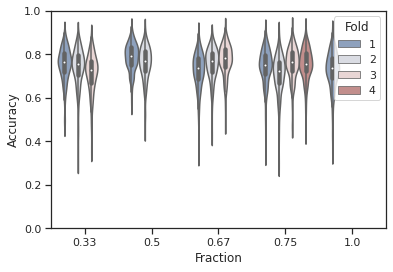

In [34]:
g = sns.violinplot(
    x='Fraction', 
    y='Accuracy', 
    hue='Fold', 
    data=df.query('Window == "30 s"'),
    palette='vlag'
)
plt.ylim([0.0, 1.0])
f = g.get_figure()
# f.savefig('results/figure-n_records-acc.png', dpi=300, bbox_inches='tight', pad_inches=0)


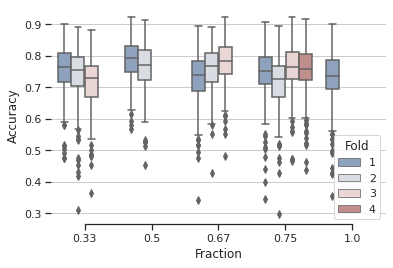

In [38]:
f, ax = plt.subplots()
sns.boxplot(x='Fraction', y='Accuracy', hue='Fold', data=df.query('Window == "30 s"'), palette='vlag', ax=ax)
ax.yaxis.grid(True)
sns.despine(trim=True, left=True)
f.savefig('results/figure-n_records-acc.png', dpi=300, bbox_inches='tight', pad_inches=0)

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,F1 - N3,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,Fraction,Fold
0,A0001_5 180135.h5,A0001_5 180135,1 s,all,0.673928,0.613602,0.550293,0.471531,0.491005,0.490882,...,0.000000,0.000000,0.000000,0.0,0.629213,0.488565,0.883577,8220.0,0.33,1
1,A0028_5 163131.h5,A0028_5 163131,1 s,all,0.690717,0.658277,0.580282,0.577307,0.571802,0.658277,...,0.375121,0.244613,0.804167,1200.0,0.760162,0.708086,0.820507,13800.0,0.33,1
2,A0049_7 181030.h5,A0049_7 181030,1 s,all,0.636434,0.651797,0.502713,0.584734,0.567814,0.651797,...,0.449357,0.324626,0.729744,3900.0,0.704967,0.618586,0.819390,9180.0,0.33,1
3,A0119_3 051910.h5,A0119_3 051910,1 s,all,0.667749,0.662408,0.554208,0.596582,0.589454,0.662408,...,0.773957,0.696599,0.870642,6540.0,0.463179,0.323634,0.814286,3360.0,0.33,1
4,A0148_4 164303.h5,A0148_4 164303,1 s,all,0.431908,0.590294,0.217863,0.339993,0.360490,0.590294,...,0.060417,0.031224,0.929167,240.0,0.390580,0.293373,0.584127,5040.0,0.33,1


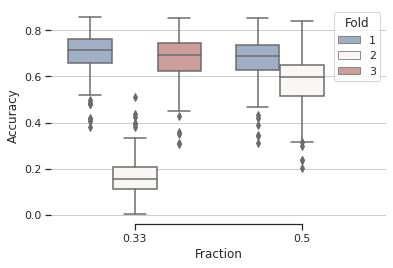

In [2]:
df_list = [
    (0.33, 1, './experiments/massc/cv3_cvidx0/20201116_070633'),
    (0.33, 2, './experiments/massc/cv3_cvidx1/20201116_070633'),
    (0.33, 3, './experiments/massc/cv3_cvidx2/20201116_070633'),
    (0.5, 1, './experiments/massc/cv2_cvidx0/20201116_070649'),
    (0.5, 2, './experiments/massc/cv2_cvidx1/20201116_070633'),
    # (0.67, 1, './experiments/massc/cv-3_cvidx0/20201111_023901'),
    # (0.67, 2, './experiments/massc/cv-3_cvidx1/20201111_032414'),
    # (0.67, 3, './experiments/massc/cv-3_cvidx2/20201111_023901'),
    # (0.75, 1, './experiments/massc/cv-4_cvidx0/20201111_143355'),
    # (0.75, 2, './experiments/massc/cv-4_cvidx1/20201111_143355'),
    # (0.75, 3, './experiments/massc/cv-4_cvidx2/20201111_143355'),
    # (0.75, 4, './experiments/massc/cv-4_cvidx3/20201111_161232'),
    # (1.00, 1, './experiments/massc/cv1_cvidx0/20201113_134910')
]

df = []
cm = []
for frac, cv_idx, f in df_list:
    df_ = pd.read_csv(os.path.join(f, 'eval_results.csv'), index_col=0)
    df_['Fraction'] = frac
    df_['Fold'] = cv_idx
    df.append(df_)
df = pd.concat(df, ignore_index=True).reset_index(drop=True)
display(df.head())
f, ax = plt.subplots()
sns.boxplot(x='Fraction', y='Accuracy', hue='Fold', data=df.query('Window == "30 s"'), palette='vlag', ax=ax)
ax.yaxis.grid(True)
sns.despine(trim=True, left=True)
# f.savefig('results/figure-n_records-acc.png', dpi=300, bbox_inches='tight', pad_inches=0)

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,F1 - N3,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,Fraction,Fold
0,A0001_5 180135.h5,A0001_5 180135,1 s,all,0.672906,0.611509,0.549088,0.471811,0.490922,0.489207,...,0.000000,0.000000,0.000000,0.0,0.635349,0.497317,0.879440,8220.0,0.33,1
1,A0028_5 163131.h5,A0028_5 163131,1 s,all,0.693847,0.660689,0.583766,0.577225,0.572149,0.660689,...,0.365395,0.235210,0.818333,1200.0,0.767009,0.720619,0.819783,13800.0,0.33,1
2,A0049_7 181030.h5,A0049_7 181030,1 s,all,0.639928,0.653156,0.505820,0.587344,0.572543,0.653156,...,0.439985,0.312696,0.742051,3900.0,0.710617,0.636105,0.804902,9180.0,0.33,1
3,A0119_3 051910.h5,A0119_3 051910,1 s,all,0.673095,0.664460,0.560399,0.599219,0.590555,0.664460,...,0.773865,0.688259,0.883792,6540.0,0.468229,0.329962,0.805952,3360.0,0.33,1
4,A0148_4 164303.h5,A0148_4 164303,1 s,all,0.444652,0.591526,0.226064,0.346315,0.363845,0.591526,...,0.058629,0.030274,0.925000,240.0,0.392918,0.299119,0.572421,5040.0,0.33,1


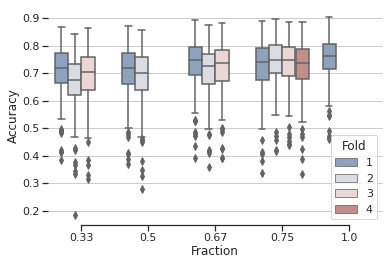

In [55]:
df_list = [
    (0.33, 1, './experiments/massc/cv3_cvidx0/20201116_070633'),
    (0.33, 2, './experiments/massc/cv3_cvidx1/20201116_070633'),
    (0.33, 3, './experiments/massc/cv3_cvidx2/20201116_070633'),
    (0.5, 1, './experiments/massc/cv2_cvidx0/20201116_070649'),
    (0.5, 2, './experiments/massc/cv2_cvidx1/20201116_070633'),
    (0.67, 1, './experiments/massc/cv-3_cvidx0/20201116_173909'),
    (0.67, 2, './experiments/massc/cv-3_cvidx1/20201116_152130'),
    (0.67, 3, './experiments/massc/cv-3_cvidx2/20201116_152129'),
    (0.75, 1, './experiments/massc/cv-4_cvidx0/20201116_152129'),
    (0.75, 2, './experiments/massc/cv-4_cvidx1/20201116_181635'),
    (0.75, 3, './experiments/massc/cv-4_cvidx2/20201116_152133'),
    (0.75, 4, './experiments/massc/cv-4_cvidx3/20201116_155556'),
    (1.00, 1, './experiments/massc/cv1_cvidx0/20201113_134910')
]

df = []
cm = []
for frac, cv_idx, f in df_list:
    try:
        df_ = pd.read_csv(os.path.join(f, 'SSC-WSC_eval_results.csv'), index_col=0)
    except:
        df_ = pd.read_csv(os.path.join(f, 'eval_results.csv'), index_col=0)
    df_['Fraction'] = frac
    df_['Fold'] = cv_idx
    df.append(df_)
df = pd.concat(df, ignore_index=True).reset_index(drop=True)
display(df.head())
f, ax = plt.subplots()
sns.boxplot(x='Fraction', y='Accuracy', hue='Fold', data=df.query('Window == "30 s"'), palette='vlag', ax=ax)
ax.yaxis.grid(True)
sns.despine(trim=True, left=True)
# ax.legend(bbox_to_anchor=(1.01, 1))
# ax.legend(mode='expand')
# f.savefig('results/figure-n_records-acc.png', dpi=300, bbox_inches='tight', pad_inches=0)

,Fraction,Fold,Acc,F1,W,N1,N2,N3,R
0,0.33,1,0.707636,0.646097,0.866533,0.394485,0.626591,0.902352,0.921342
1,0.33,2,0.669979,0.615677,0.866610,0.365307,0.568216,0.849470,0.914836
2,0.33,3,0.693248,0.639333,0.870160,0.423121,0.596225,0.892896,0.915359
3,0.50,1,0.707855,0.654585,0.867104,0.464162,0.622055,0.899189,0.896267
4,0.50,2,0.693006,0.637898,0.854682,0.421246,0.602058,0.898845,0.910798
5,0.67,1,0.735473,0.680549,0.872723,0.511099,0.667895,0.866318,0.897247
6,0.67,2,0.710684,0.655518,0.857672,0.453039,0.626287,0.880484,0.931019
7,0.67,3,0.724408,0.664227,0.864587,0.450794,0.658341,0.879384,0.896724
8,0.75,1,0.725832,0.665432,0.868258,0.448155,0.658610,0.875464,0.904816
9,0.75,2,0.740694,0.679907,0.867765,0.470846,0.678074,0.882891,0.921848


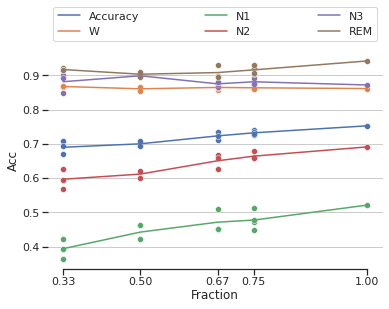

In [44]:
cm_list = df_list
# cm_list = [
#     (0.33, 1, './experiments/massc/cv3_cvidx0/20201112_061958'),
#     (0.33, 2, './experiments/massc/cv3_cvidx1/20201112_061958'),
#     (0.33, 3, './experiments/massc/cv3_cvidx2/20201112_075900'),
#     (0.5, 1, './experiments/massc/cv2_cvidx0/20201110_031834'),
#     (0.5, 2, './experiments/massc/cv2_cvidx1/20201110_031845'),
#     (0.67, 1, './experiments/massc/cv-3_cvidx0/20201111_023901'),
#     (0.67, 2, './experiments/massc/cv-3_cvidx1/20201111_032414'),
#     (0.67, 3, './experiments/massc/cv-3_cvidx2/20201111_023901'),
#     (0.75, 1, './experiments/massc/cv-4_cvidx0/20201111_143355'),
#     (0.75, 2, './experiments/massc/cv-4_cvidx1/20201111_143355'),
#     (0.75, 3, './experiments/massc/cv-4_cvidx2/20201111_143355'),
#     (0.75, 4, './experiments/massc/cv-4_cvidx3/20201111_161232'),
#     (1.00, 1, './experiments/massc/cv1_cvidx0/20201113_134910')
# ]

eval_window = 30
case = 'all'
fraction = []
fold = []
acc = []
F1 = []
w = []
n1 = []
n2 = []
n3 = []
r = []
for frac, cv_idx, f in df_list:
    try:
        with open(os.path.join(f, 'SSC-WSC_eval_confusionmatrix.pkl'), 'rb') as pkl:
            cm = pickle.load(pkl)['confusiomatrix_total']
    except:
        with open(os.path.join(f, 'SSC-WSC_eval_confusionmatrix.pkl'), 'rb') as pkl:
            cm = pickle.load(pkl)['confusionmatrix_total']
    N = cm[eval_window][case].sum()
    acc.append(np.diag(cm[eval_window][case]).sum() / N)

    NP = cm[eval_window][case].sum(axis=1)
    PP = cm[eval_window][case].sum(axis=0)
    precision = np.diag(cm[eval_window][case]) / (PP + 1e-10)
    recall = np.diag(cm[eval_window][case]) / (NP + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)
    F1.append(f1.mean())
    fraction.append(frac)
    fold.append(cv_idx)
    w.append(np.diag(cm[eval_window][case])[0] / NP[0])
    n1.append(np.diag(cm[eval_window][case])[1] / NP[1])
    n2.append(np.diag(cm[eval_window][case])[2] / NP[2])
    n3.append(np.diag(cm[eval_window][case])[3] / NP[3])
    r.append(np.diag(cm[eval_window][case])[4] / NP[4])

df_acc = pd.DataFrame({'Fraction': fraction, 'Fold': fold, 'Acc': acc, 'F1': F1, 'W': w, 'N1': n1, 'N2': n2, 'N3': n3, 'R': r})
display(df_acc)
f, ax = plt.subplots()
sns.lineplot(x='Fraction', y='Acc', data=df_acc.groupby('Fraction').mean(), label='Accuracy')
sns.lineplot(x='Fraction', y='W', data=df_acc.groupby('Fraction').mean(), label='W')
sns.lineplot(x='Fraction', y='N1', data=df_acc.groupby('Fraction').mean(), label='N1')
sns.lineplot(x='Fraction', y='N2', data=df_acc.groupby('Fraction').mean(), label='N2')
sns.lineplot(x='Fraction', y='N3', data=df_acc.groupby('Fraction').mean(), label='N3')
sns.lineplot(x='Fraction', y='R', data=df_acc.groupby('Fraction').mean(), label='REM')
sns.scatterplot(x='Fraction', y='Acc', data=df_acc)
sns.scatterplot(x='Fraction', y='W', data=df_acc)
sns.scatterplot(x='Fraction', y='N1', data=df_acc)
sns.scatterplot(x='Fraction', y='N2', data=df_acc)
sns.scatterplot(x='Fraction', y='N3', data=df_acc)
sns.scatterplot(x='Fraction', y='R', data=df_acc)
ax.set_xticks(df_acc.Fraction.unique())
ax.yaxis.grid(True)
sns.despine(trim=True, left=True)
ax.legend(ncol=3, bbox_to_anchor=(0., 1.02, 1., 0.102), mode='expand')
# f.savefig('results/figure-n_records-acc_grouped.png', dpi=300, bbox_inches='tight', pad_inches=0)

,Fraction,Fold,Acc,F1
0,0.33,1,0.754005,0.692027
1,0.33,2,0.740881,0.677691
2,0.33,3,0.716240,0.659395
3,0.50,1,0.786386,0.730478
4,0.50,2,0.762034,0.702606
5,0.67,1,0.727581,0.661286
6,0.67,2,0.759453,0.707150
7,0.67,3,0.775833,0.714995
8,0.75,1,0.743355,0.681760
9,0.75,2,0.711731,0.659036


<AxesSubplot:xlabel='Fraction', ylabel='F1'>

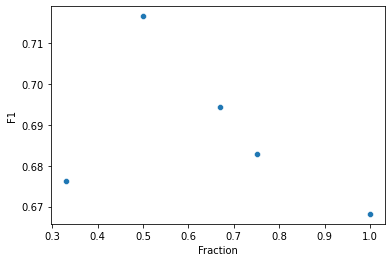

In [8]:
cm_list = df_list
# cm_list = [
#     (0.33, 1, './experiments/massc/cv3_cvidx0/20201112_061958'),
#     (0.33, 2, './experiments/massc/cv3_cvidx1/20201112_061958'),
#     (0.33, 3, './experiments/massc/cv3_cvidx2/20201112_075900'),
#     (0.5, 1, './experiments/massc/cv2_cvidx0/20201110_031834'),
#     (0.5, 2, './experiments/massc/cv2_cvidx1/20201110_031845'),
#     (0.67, 1, './experiments/massc/cv-3_cvidx0/20201111_023901'),
#     (0.67, 2, './experiments/massc/cv-3_cvidx1/20201111_032414'),
#     (0.67, 3, './experiments/massc/cv-3_cvidx2/20201111_023901'),
#     (0.75, 1, './experiments/massc/cv-4_cvidx0/20201111_143355'),
#     (0.75, 2, './experiments/massc/cv-4_cvidx1/20201111_143355'),
#     (0.75, 3, './experiments/massc/cv-4_cvidx2/20201111_143355'),
#     (0.75, 4, './experiments/massc/cv-4_cvidx3/20201111_161232'),
#     (1.00, 1, './experiments/massc/cv1_cvidx0/20201113_134910')
# ]

eval_window = 30
case = 'all'
fraction = []
fold = []
acc = []
F1 = []
for frac, cv_idx, f in df_list:
    with open(os.path.join(f, 'eval_confusionmatrix.pkl'), 'rb') as pkl:
        cm = pickle.load(pkl)['confusionmatrix_total']
    N = cm[eval_window][case].sum()
    acc.append(np.diag(cm[eval_window][case]).sum() / N)

    NP = cm[eval_window][case].sum(axis=1)
    PP = cm[eval_window][case].sum(axis=0)
    precision = np.diag(cm[eval_window][case]) / (PP + 1e-10)
    recall = np.diag(cm[eval_window][case]) / (NP + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)
    F1.append(f1.mean())
    fraction.append(frac)
    fold.append(cv_idx)

df_acc = pd.DataFrame({'Fraction': fraction, 'Fold': fold, 'Acc': acc, 'F1': F1})
display(df_acc)

sns.scatterplot(x='Fraction', y='F1', data=df_acc.groupby('Fraction').mean())

In [36]:
df_acc.groupby(['Fraction']).mean()

,Fold,Acc
Fraction,,
0.33,1.5,0.747443
0.50,2.0,0.762034
0.67,2.0,0.754289
0.75,2.0,0.736175
